In [1]:
!pip install yfinance==0.1.67
#!pip install pandas==1.3.3
#!pip install requests==2.26.0
!mamba install bs4==4.10.0 -y
#!pip install plotly==5.3.1


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.15.3) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

pkgs/main/noarch         [>                   ] (--:--) No change
pkgs/main/noarch

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Question 1: Use yfinance to Extract Stock Data

In [5]:
tesla = yf.Ticker("TSLA")
tesla_info=tesla.info
tesla_info
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


Question 2: Use Webscraping to Extract Tesla Revenue Data

In [18]:
url=" https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue."
html_data=requests.get(url).text
beautiful_soup=BeautifulSoup(html_data,"html5lib")
tables=beautiful_soup.find_all("table")
for index,table in enumerate(tables):
    if("Tesla Quarterly Revenue" in str(table)):
        table_index=index
tesla_revenue=pd.DataFrame(columns=["Date","Revenue"])

for row in tables[table_index].tbody.find_all('tr'):
    col=row.find_all("td")
    if(col!=[]):
        date=col[0].text
        revenue=col[1].text.strip().replace("$","").replace(",","")
        tesla_revenue=tesla_revenue.append({"Date":date,"Revenue":revenue},ignore_index=True)
tesla_revenue.head()

tesla_revenue.dropna(inplace=True)
not_empty=tesla_revenue["Revenue"]!=""
tesla_revenue=tesla_revenue[not_empty]
tesla_revenue.tail()

,Date,Revenue
45,2010-09-30,31
46,2010-06-30,28
47,2010-03-31,21
49,2009-09-30,46
50,2009-06-30,27


Question 3: Use yfinance to Extract Stock Data

In [9]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,6.480513,6.773399,6.413183,6.766665,19054000,0.0,0.0
1,2002-02-14,6.850829,6.864295,6.682504,6.733001,2755400,0.0,0.0
2,2002-02-15,6.733003,6.749835,6.632008,6.699337,2097400,0.0,0.0
3,2002-02-19,6.665672,6.665672,6.312189,6.430017,1852600,0.0,0.0
4,2002-02-20,6.463681,6.648839,6.413183,6.648839,1723200,0.0,0.0


Question 4: Use Webscraping to Extract GME Revenue Data

In [30]:
url="https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue."
html_data=requests.get(url).text
beautiful_soup=BeautifulSoup(html_data,"html.parser")
tables=beautiful_soup.find_all("table")
for index,table in enumerate(tables):
    if(str(table)=="GameStop Quarterly Revenue"):
        table_index=index

gme_revenue=pd.DataFrame(columns=["Date","Revenue"])

for row in tables[table_index].tbody.find_all("tr"):
    col=row.find_all("td")
    if(col!=[]):
        date=col[0].text
        revenue=col[1].text.replace("$","").replace(",","")
        gme_revenue=gme_revenue.append({"Date":date,"Revenue":revenue},ignore_index=True)
gme_revenue.tail()

,Date,Revenue
47,2010-01-31,3524
48,2009-10-31,1835
49,2009-07-31,1739
50,2009-04-30,1981
51,2009-01-31,3492


Question 5: Plot Tesla Stock Graph


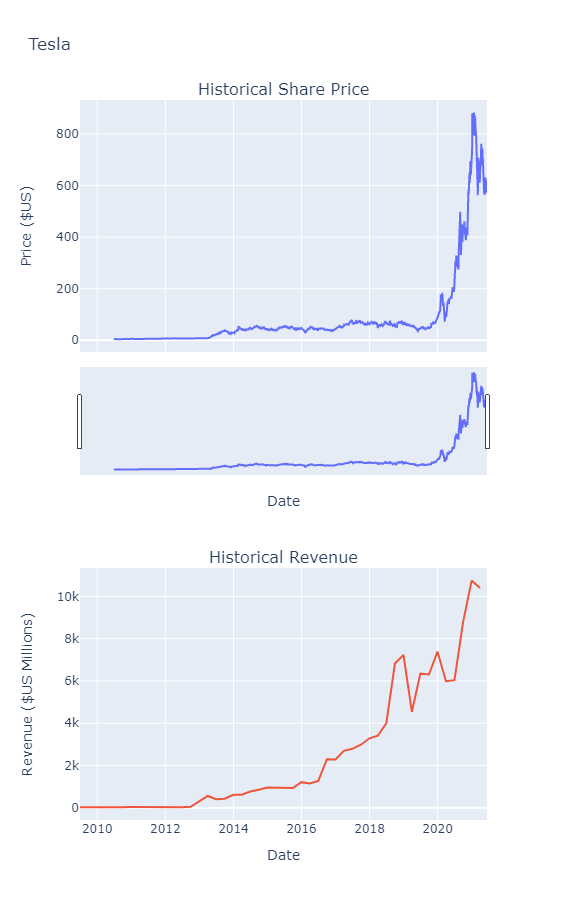

In [22]:
make_graph(tesla_data, tesla_revenue, 'Tesla')


Question 6: Plot GameStop Stock Graph


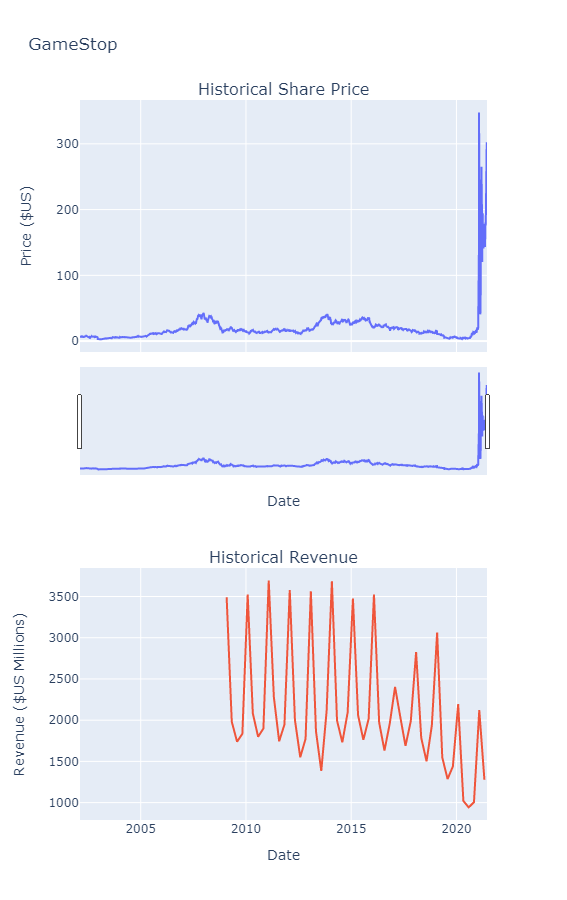

In [23]:
make_graph(gme_data,gme_revenue,'GameStop')
